# Classification of Handwritten Digits from the MNIST Database

We will illustrate multiple Machine Learning algorithms by using them for classifying handwritten digits.

# Using Classwise Logistic Regression

Here we perform [logistic regression](http://ufldl.stanford.edu/tutorial/supervised/LogisticRegression/) on each class of digit. For a given digit, then we choose the class with maximum (log) likelihood that the digit belongs to that class. We use stochastic gradient descent to get the values of the regression parameters. 

Note here that these likelihoods are not probabilities that the digit belongs to a particular class (they need not even sum to 1). This is a discriminative algorithm.

The naive implementation of this algorithm is unlikely to give a very good result, as for each class the ratio of members of the class to non-members of the class is 1 : 9 (ie, the data is biased). Therefore, we correct for the bias in the data by taking a 1 : 1 ratio of class members and non-class members during gradient descent. 

In [2]:
#fetching the data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

#dimensions of image
print(mnist.data.shape)

#Splitting the data
from sklearn.model_selection import train_test_split
train_img, test_img, train_label, test_label = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

#import logistic regression model
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression(solver = 'lbfgs')

#training the data
logisticReg.fit(train_img,train_label)

#predictions
predictions = logisticReg.predict(test_img)

#accuracy
score = logisticReg.score(test_img, test_label)
print(100*score)



c:\Python310\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


91.84


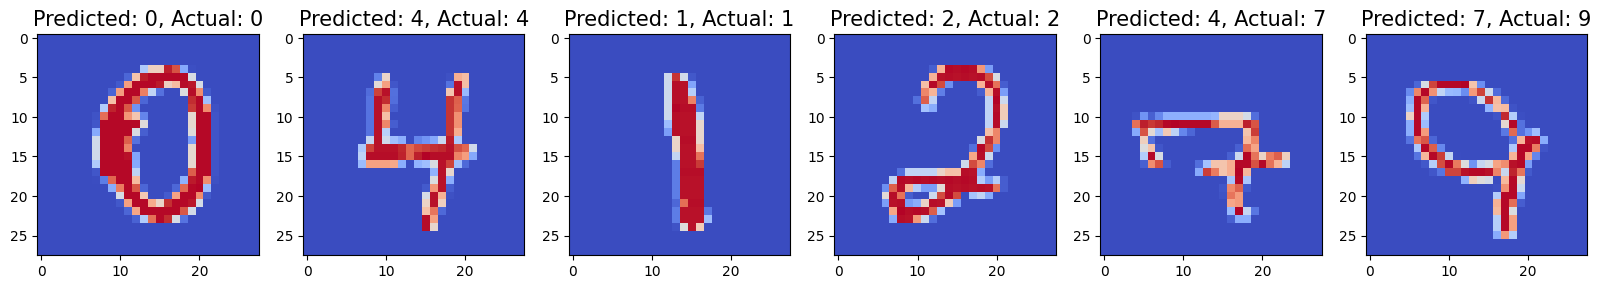

In [52]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

index=0
incorrect_index = []
for label, predict in zip(test_label, predictions):
    if label != predict: 
        incorrect_index.append(index)
    index = index + 1

plt.figure(figsize=(20,4))
for badIndex in range(0,6):
    stuff = badIndex
    plt.subplot(1,6,stuff+1)
    a=np.reshape(np.array(test_img.iloc[badIndex][:]),(28,28))
    plt.imshow(a, cmap=plt.cm.coolwarm)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_label.iloc[badIndex]), fontsize = 15)




With ```6000``` iterations of gradient descent, a learning rate of ```0.01``` and a minibatch size of ```180```, we get an accuracy of ```88.54%```.

## Using Softmax Regression

[This](http://deeplearning.stanford.edu/tutorial/supervised/SoftmaxRegression/) is more appropriate for multiclass classification than plain logistic regression. Here the probabilities of a digit belonging to a class are drawn from a multivariate Bernoulli distribution, on which we perform maximum likelihood estimation via stochastic gradient descent. 

This is also a discriminative model.

In [48]:
#fetching the data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

#dimensions of image
print(mnist.data.shape)

#Splitting the data
from sklearn.model_selection import train_test_split
train_img, test_img, train_label, test_label = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

#import logistic regression model
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression(solver = 'lbfgs',multi_class='multinomial')

#training the data
logisticReg.fit(train_img,train_label)

#predictions
predictions = logisticReg.predict(test_img)

#accuracy
score = logisticReg.score(test_img, test_label)
print(100*score)



c:\Python310\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


91.84


With ```8000``` iterations of gradient descent, a learning rate of ```0.01``` and a minibatch size of ```500```, we get an accuracy of ```90.13%```.

## Gaussian Discriminant Analysis

We assume each class of digit is distributed according to some Multivariate Gaussian whose mean and covariance we calculate (using the sample mean and sample covariance of each digit). Have a look at the slides on Multivariate Gaussian for an overview.

To classify a digit then, we choose the class such that the probability that the digit belongs to the class is maximum. We calculate this probability using Baye's Theorem ( $P(y | x) = \frac{P(x | y)P(y)}{P(x)}$ ). This is an example of a generative learning model.

However, while calculating the sample covariance, it will come out to be singular or almost singular, as there are a large number of principal components with eigenvalues close to 0 (or 0). Therefore, we must reduce the dimensionality of the data by projecting it onto the space spanned by the first few principal components. Note that since we're already calculating the principal components here, there is no need to normalize the data.

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

#dimensions of image
print(mnist.data.shape)



c:\Python310\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)
0.861


In [10]:
#Splitting the data
from sklearn.model_selection import train_test_split
train_img2, test_img2, train_label2, test_label2 = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(train_img2)
normal_X_train= scaler.transform(train_img2)
normal_X_test = scaler.transform(test_img2)




from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
PCA_X_train = pca.fit_transform(normal_X_train)
PCA_X_test = pca.transform(normal_X_test)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
GNB= LinearDiscriminantAnalysis(solver='svd')
GNB.fit(PCA_X_train,train_label2)
y_GNB = GNB.predict(PCA_X_test)



from sklearn.metrics import accuracy_score
acc = accuracy_score(test_label2,y_GNB)

print(acc)

0.861


### Hyperparameter Tuning
The hyperparameter here is the number of principal components considered. We choose the number that maximizes the accuracy on testing.

| Number of Principal Components           | Accuracy               |
| ---------------------------------------- | -----------------------|
| ```1```                                  | ```4.55%```            |
| ```80```                                 | ```94.24%```           |
| ```150```                                | ```95.59%```           |
| ```240```                                | ```94.78%```           |
| ```320```                                | ```93.72%```           |
| ```400```                                | ```91.45%```           |
| ```480```                                | ```87.61%```           |
| ```560```                                | ```65.83%```           |
| ```640```                                | ```9.8%```             |
| ```720```                                | ```9.8%```             |
| ```784```                                | ```9.8%```             |


# Using Support Vector Machines

Here we make ${10\choose 2} = 45$ support vector machines that can distinguish every pair of classes. We will use Linear and RBF/Gaussian Kernels for the support vector machines and use the [SMO Algorithm](https://web.iitd.ac.in/~sumeet/tr-98-14.pdf), discovered by John C Platt for optimization. This is much faster than Gradient Descent would be, as it makes use of the fact that the dual problem of the SVM is a Quadratic Optimization Problem.

The support vector machine is another discriminative algorithm, but this one can identify non-linear decision boundaries as well.

For a given image, we will map it to the digit to which it is classified the most (on average, the image will be mapped to the correct digit $\frac{9}{4}$ times more than the other digits).

In [14]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

#dimensions of image
print(mnist.data.shape)
#Splitting the data
from sklearn.model_selection import train_test_split
train_img3, test_img3, train_label3, test_label3 = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(train_img3)
normalized_X_train= scaler.transform(train_img3)
normalized_X_test = scaler.transform(test_img3)




from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
pca_X_train = pca.fit_transform(normalized_X_train)
pca_X_test = pca.transform(normalized_X_test)



from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(pca_X_train,train_label3)
y_clf = clf.predict(pca_X_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(test_label3,y_clf)

print(acc)

c:\Python310\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)
0.9829
